*   Modelagem e Simulação - Inferência Estatística (Intervalo de Confiança)

*   Felipe Daniel Dias dos Santos - 11711ECP004

*   Graduação em Engenharia de Computação - Faculdade de Engenharia Elétrica - Universidade Federal de Uberlândia

Podemos interpretar o conceito de intervalo de confiança através de simulações:

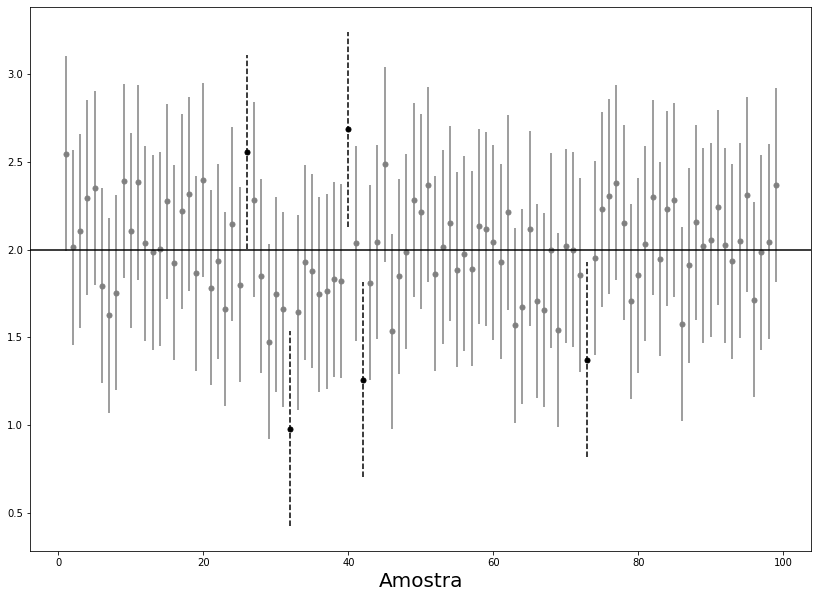

Nível de confiança: 0.95
Fração de intervalos que contém a média: 0.94


In [ ]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

n = 50
Ns = 100
mu = 2
sigma = 2
beta = 0.95
zalpha = 1.96
c = 0

plt.figure(figsize = (14, 10))

for s in range(1, Ns):
  
  x = np.random.normal(mu, sigma, n)
  IC1 = np.mean(x) - zalpha * sigma / np.sqrt(n)
  IC2 = np.mean(x) + zalpha * sigma / np.sqrt(n)
  
  if mu > IC1 and mu < IC2:

    c += 1

    plt.vlines(s, ymin = IC1, ymax = IC2, color = 'gray')
    plt.plot(s, np.mean(x), 'o', color = 'gray', markersize = 5)
  
  else:
    
    plt.vlines(s, ymin = IC1, ymax = IC2, color = 'black', linestyles = 'dashed')
    plt.plot(s, np.mean(x), 'o', color = 'black', markersize = 5)

plt.axhline(y = mu, color = 'black')
plt.xlabel('Amostra', fontsize = 20)
plt.show()

print('Nível de confiança:', beta)
print('Fração de intervalos que contém a média:', c / Ns)

Implementação de uma função para calcular o intervalo de confiança automaticamente:

In [ ]:
def confident_interval(Xs, n, confidence = 0.95, sigma = -1, s = -1):

  zalpha = abs(scipy.stats.norm.ppf((1 - confidence) / 2.))
  
  if sigma != -1:
   
    IC1 = Xs - zalpha * sigma / np.sqrt(n)
    IC2 = Xs + zalpha * sigma / np.sqrt(n)
  
  else:
 
    if n >= 50:

      IC1 = Xs - zalpha * s / np.sqrt(n)
      IC2 = Xs + zalpha * s / np.sqrt(n)
    
    else:
      
      talpha = scipy.stats.t.ppf((1 + confidence) / 2., n - 1)
      IC1 = Xs - talpha * s / np.sqrt(n)
      IC2 = Xs + talpha * s / np.sqrt(n)
  
  return [IC1, IC2]

Exemplo: Em uma empresa de distribuição de alimentos pela internet, verificou-se que o tempo necessário para uma entrega tem distribuição normal com média $\mu = 30$ minutos e desvio padrão $\sigma = 10$ minutos. Em uma amostra de 50 entregadores, observou-se um tempo médio de entrega $\bar{X}_{50} = 25$ minutos. Determine o intervalo de 95\% de confiança para a média $\mu$ de todos os entregadores da empresa.

In [ ]:
Xs = 25
n = 50
confidence = 0.95
sigma = 10

IC = confident_interval(Xs, n, confidence, sigma)
print('Intervalo de confiança:', IC)

Intervalo de confiança: [22.228192351300645, 27.771807648699355]


Exemplo: Em um provedor de videos na Internet, verificou-se que para uma amostra de 15 usuários, o tempo médio de exibição é igual a $\bar{X}_{15} = 39,3$ minutos e o desvio padrão da amostra $S_{15} = 2,6$ minutos. Encontre um intervalo de 90\% para a média populacional $\mu$.

In [ ]:
Xs = 39.3
s = 2.6
n = 15
confidence = 0.9

IC = confident_interval(Xs, n, confidence, -1, s)
print('Intervalo de confiança:', IC)

Intervalo de confiança: [38.117602363950525, 40.48239763604947]


Para um conjunto de dados, podemos implementar uma função que calcula o intervalo de confiança:

In [ ]:
def confident_interval_data(X, confidence = 0.95, sigma = -1):
    
  def S(X):
    
    s = 0
    
    for i in range(0, len(X)):
      
      s += (X[i] - np.mean(X)) ** 2
      
    s = np.sqrt(s / (len(X) - 1))
    
    return s
    
  n = len(X)
  Xs = np.mean(X)
  s = S(X)
  zalpha = abs(scipy.stats.norm.ppf((1 - confidence) / 2))
    
  if sigma != -1:
    
    IC1 = Xs - zalpha * sigma / np.sqrt(n)
    IC2 = Xs + zalpha * sigma / np.sqrt(n)
    
  else:
    
    if n >= 50:
      
      IC1 = Xs - zalpha * s / np.sqrt(n)
      IC2 = Xs + zalpha * s / np.sqrt(n)
        
    else:
      
      talpha = scipy.stats.t.ppf((1 + confidence) / 2., n - 1)
      IC1 = Xs - talpha * s / np.sqrt(n)
      IC2 = Xs + talpha * s / np.sqrt(n)
    
  return [IC1, IC2]

Exemplo de utilização da função:

In [ ]:
X = [1, 2, 3, 4, 5]
confidence = 0.95

IC = confident_interval_data(X, confidence)
print('Intervalo de confiança:', IC)

Intervalo de confiança: [1.0367568385224393, 4.9632431614775605]
